# Evaluate region-specific classification thresholds

### Regions of interest: ARISE sites

- VAG in Namibia
- VAG in Zambia -> no overlap between prediction for exemplary VAG and sampled points from KAZA Bengo Crop 2020 Random 20000 dataset
- VAG in Zimbabwe

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set_theme()

In [4]:
directory = '../processed_data/classification_threshold_evaluation/NAM'

In [5]:
region_of_interest = 'VAG in Namibia'

## Actual sampled train and test points within region of interest

Dataset: KAZABengoCrop2020Random20000

In [6]:
file = 'actual_labels.csv'
path = os.path.join(directory, file)
actual_labels = pd.read_csv(path)
actual_labels

,system:index,crop,subset,.geo
0,00000000000000000063,0,train,"{""type"":""Point"",""coordinates"":[23.397175232594..."
1,00000000000000000126,0,train,"{""type"":""Point"",""coordinates"":[23.400969927591..."
2,00000000000000000181,0,train,"{""type"":""Point"",""coordinates"":[23.769523547860..."
3,000000000000000001d2,0,train,"{""type"":""Point"",""coordinates"":[23.500849332087..."
4,000000000000000001de,0,train,"{""type"":""Point"",""coordinates"":[24.054928310786..."
...,...,...,...,...
1132,00000000000000004d74,1,test,"{""type"":""Point"",""coordinates"":[23.431510310706..."
1133,00000000000000004d8b,1,test,"{""type"":""Point"",""coordinates"":[23.408287312419..."
1134,00000000000000004dde,1,test,"{""type"":""Point"",""coordinates"":[23.437507801623..."
1135,00000000000000004dfc,1,test,"{""type"":""Point"",""coordinates"":[23.656253462901..."


In [7]:
actual_labels['lon'] = actual_labels.apply(lambda x: eval(x['.geo'])['coordinates'][0], axis=1)
actual_labels['lat'] = actual_labels.apply(lambda x: eval(x['.geo'])['coordinates'][1], axis=1)
actual_labels = actual_labels.drop('.geo', axis=1)
actual_labels

,system:index,crop,subset,lon,lat
0,00000000000000000063,0,train,23.397175,-17.885450
1,00000000000000000126,0,train,23.400970,-17.998938
2,00000000000000000181,0,train,23.769524,-17.937492
3,000000000000000001d2,0,train,23.500849,-17.899050
4,000000000000000001de,0,train,24.054928,-17.880576
...,...,...,...,...,...
1132,00000000000000004d74,1,test,23.431510,-17.766976
1133,00000000000000004d8b,1,test,23.408287,-17.686962
1134,00000000000000004dde,1,test,23.437508,-17.972019
1135,00000000000000004dfc,1,test,23.656253,-18.253161


In [8]:
actual_labels['subset'].value_counts()

train    922
test     215
Name: subset, dtype: int64

## Test set predictions from random forest within region of interest

Evaluate different classification thresholds for random forest based on the sampled test points within the region of interest.

Data used for training: KAZABengoCrop2020Random20000

In [9]:
file = 'random_forest_class_probabilities.csv'
path = os.path.join(directory, file)
random_forest_class_probabilities = pd.read_csv(path)
random_forest_class_probabilities

,system:index,B2,B3,B4,B8,NDVI,classification,crop,.geo
0,00000000000000003edf_0,0.048067,0.068900,0.065750,0.20275,0.510176,0.252989,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,00000000000000003ef4_0,0.039150,0.054850,0.043800,0.20735,0.651427,0.229553,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,00000000000000003f36_0,0.040700,0.062150,0.059250,0.22790,0.587635,0.352720,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,00000000000000003f5f_0,0.040525,0.064625,0.057425,0.23850,0.611931,0.129294,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,00000000000000003f74_0,0.036300,0.052700,0.042250,0.24090,0.701561,0.038031,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
...,...,...,...,...,...,...,...,...,...
210,00000000000000004d74_0,0.064450,0.096350,0.104950,0.28160,0.456961,0.498670,1,"{""type"":""MultiPoint"",""coordinates"":[]}"
211,00000000000000004d8b_0,0.065300,0.085200,0.098900,0.21800,0.375777,0.514764,1,"{""type"":""MultiPoint"",""coordinates"":[]}"
212,00000000000000004dde_0,0.036900,0.057650,0.041800,0.24680,0.710346,0.129049,1,"{""type"":""MultiPoint"",""coordinates"":[]}"
213,00000000000000004dfc_0,0.076567,0.107600,0.117600,0.27880,0.406788,0.610710,1,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [10]:
random_forest_class_probabilities['system:index'] = random_forest_class_probabilities['system:index'].apply(lambda x: x.split('_')[0])
random_forest_class_probabilities = random_forest_class_probabilities[['system:index', 'classification']]
random_forest_class_probabilities = pd.merge(actual_labels, random_forest_class_probabilities, how='inner', on='system:index')
random_forest_class_probabilities = random_forest_class_probabilities.drop(['system:index', 'lon', 'lat'], axis=1)
random_forest_class_probabilities = random_forest_class_probabilities.rename(columns={'classification': 'crop_probability'})
random_forest_class_probabilities

,crop,subset,crop_probability
0,0,test,0.252989
1,0,test,0.229553
2,0,test,0.352720
3,0,test,0.129294
4,0,test,0.038031
...,...,...,...
210,1,test,0.498670
211,1,test,0.514764
212,1,test,0.129049
213,1,test,0.610710


In [11]:
thresholds = np.arange(0.1,1.1,0.1)
actual_test_labels = list(random_forest_class_probabilities['crop'])
accuracies_rf = []
for threshold in thresholds:
    predictions = [1 if i >= threshold else 0 for i in list(random_forest_class_probabilities['crop_probability'])]
    accuracy = round(accuracy_score(actual_test_labels, predictions), 2)
    accuracies_rf.append(accuracy)
    print(round(threshold, 1), accuracy)

0.1 0.71
0.2 0.72
0.3 0.69
0.4 0.66
0.5 0.65
0.6 0.59
0.7 0.49
0.8 0.4
0.9 0.34
1.0 0.32


In [12]:
rf_test_samples = random_forest_class_probabilities.shape[0]

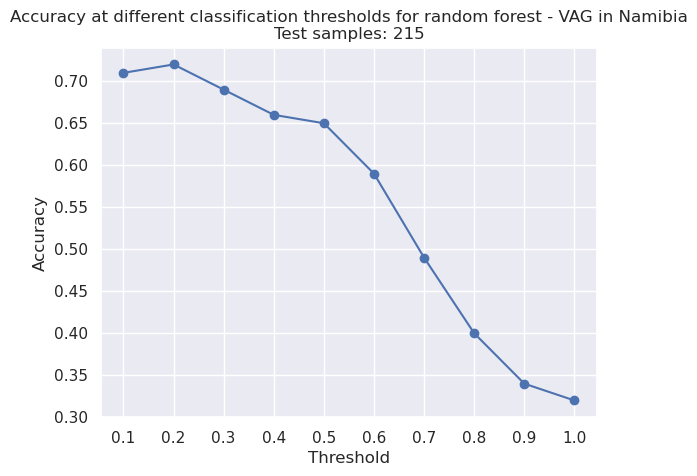

In [13]:
plt.plot(thresholds, accuracies_rf, marker='o')
plt.xticks(thresholds)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title(f'Accuracy at different classification thresholds for random forest - {region_of_interest}\nTest samples: {rf_test_samples}')
plt.show()

# Test set predictions from OpenMapFlow model within region of interest

Evaluate different classification thresholds for OpenMapFlow model based on predicted points that match train and test points from sampled dataset - within the region of interest.

Data used for training: GeowikiLandcover2017 and KAZABengoCrop2020Random2000

Note: There is a certain chance that one of the test samples from KAZABengoCrop2020Random20000 was actually included in the training set created within OpenMapFlow based on the KAZABengoCrop2020Random2000 dataset.

In [14]:
openmapflow_predictions = pd.DataFrame()
for threshold in thresholds:
    if threshold == 1.0:
        threshold = 1
    file = 'openmapflow_predictions_threshold_' + str(round(threshold, 2)).replace('.', '_') + '.csv'
    path = os.path.join(directory, file)
    openmapflow_predictions_temp = pd.read_csv(path)
    openmapflow_predictions_temp['threshold'] = threshold
    openmapflow_predictions = pd.concat([openmapflow_predictions, openmapflow_predictions_temp], ignore_index=True)
openmapflow_predictions

,system:index,count,prediction,.geo,threshold
0,+1013+1583,1,1,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0.1
1,+1022+567,1,1,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0.1
2,+1086+1551,1,1,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0.1
3,+1146+878,1,1,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0.1
4,+1249+1171,1,1,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0.1
...,...,...,...,...,...
415,+749+1267,1,0,"{""geodesic"":false,""type"":""Point"",""coordinates""...",1.0
416,+753+745,1,0,"{""geodesic"":false,""type"":""Point"",""coordinates""...",1.0
417,+858+1803,1,0,"{""geodesic"":false,""type"":""Point"",""coordinates""...",1.0
418,+891+1127,1,0,"{""geodesic"":false,""type"":""Point"",""coordinates""...",1.0


In [15]:
openmapflow_predictions['threshold'].value_counts().sort_index()

0.1    42
0.2    42
0.3    42
0.4    42
0.5    42
0.6    42
0.7    42
0.8    42
0.9    42
1.0    42
Name: threshold, dtype: int64

In [16]:
openmapflow_predictions['lon'] = openmapflow_predictions.apply(lambda x: eval(x['.geo'].replace('false', '0'))['coordinates'][0], axis=1)
openmapflow_predictions['lat'] = openmapflow_predictions.apply(lambda x: eval(x['.geo'].replace('false', '0'))['coordinates'][1], axis=1)
openmapflow_predictions = openmapflow_predictions.drop(['system:index', 'count', '.geo'], axis=1)
openmapflow_predictions

,prediction,threshold,lon,lat
0,1,0.1,24.581005,-17.632177
1,1,0.1,24.581814,-17.540908
2,1,0.1,24.587563,-17.629303
3,1,0.1,24.592953,-17.568846
4,1,0.1,24.602206,-17.595167
...,...,...,...,...
415,0,1.0,24.557290,-17.603791
416,0,1.0,24.557649,-17.556898
417,0,1.0,24.567081,-17.651940
418,0,1.0,24.570046,-17.591214


In [17]:
openmapflow_predictions = gpd.GeoDataFrame(openmapflow_predictions, geometry=gpd.points_from_xy(openmapflow_predictions.lon, openmapflow_predictions.lat))
openmapflow_predictions

,prediction,threshold,lon,lat,geometry
0,1,0.1,24.581005,-17.632177,POINT (24.58101 -17.63218)
1,1,0.1,24.581814,-17.540908,POINT (24.58181 -17.54091)
2,1,0.1,24.587563,-17.629303,POINT (24.58756 -17.62930)
3,1,0.1,24.592953,-17.568846,POINT (24.59295 -17.56885)
4,1,0.1,24.602206,-17.595167,POINT (24.60221 -17.59517)
...,...,...,...,...,...
415,0,1.0,24.557290,-17.603791,POINT (24.55729 -17.60379)
416,0,1.0,24.557649,-17.556898,POINT (24.55765 -17.55690)
417,0,1.0,24.567081,-17.651940,POINT (24.56708 -17.65194)
418,0,1.0,24.570046,-17.591214,POINT (24.57005 -17.59121)


In [18]:
actual_labels = gpd.GeoDataFrame(actual_labels, geometry=gpd.points_from_xy(actual_labels.lon, actual_labels.lat))
actual_labels

,system:index,crop,subset,lon,lat,geometry
0,00000000000000000063,0,train,23.397175,-17.885450,POINT (23.39718 -17.88545)
1,00000000000000000126,0,train,23.400970,-17.998938,POINT (23.40097 -17.99894)
2,00000000000000000181,0,train,23.769524,-17.937492,POINT (23.76952 -17.93749)
3,000000000000000001d2,0,train,23.500849,-17.899050,POINT (23.50085 -17.89905)
4,000000000000000001de,0,train,24.054928,-17.880576,POINT (24.05493 -17.88058)
...,...,...,...,...,...,...
1132,00000000000000004d74,1,test,23.431510,-17.766976,POINT (23.43151 -17.76698)
1133,00000000000000004d8b,1,test,23.408287,-17.686962,POINT (23.40829 -17.68696)
1134,00000000000000004dde,1,test,23.437508,-17.972019,POINT (23.43751 -17.97202)
1135,00000000000000004dfc,1,test,23.656253,-18.253161,POINT (23.65625 -18.25316)


In [19]:
openmapflow_predictions = gpd.sjoin_nearest(openmapflow_predictions, actual_labels, how='inner')
openmapflow_predictions

,prediction,threshold,lon_left,lat_left,geometry,index_right,system:index,crop,subset,lon_right,lat_right
0,1,0.1,24.581005,-17.632177,POINT (24.58101 -17.63218),347,0000000000000000429f,0,test,24.580995,-17.632195
42,1,0.2,24.581005,-17.632177,POINT (24.58101 -17.63218),347,0000000000000000429f,0,test,24.580995,-17.632195
84,0,0.3,24.581005,-17.632177,POINT (24.58101 -17.63218),347,0000000000000000429f,0,test,24.580995,-17.632195
126,0,0.4,24.581005,-17.632177,POINT (24.58101 -17.63218),347,0000000000000000429f,0,test,24.580995,-17.632195
168,0,0.5,24.581005,-17.632177,POINT (24.58101 -17.63218),347,0000000000000000429f,0,test,24.580995,-17.632195
...,...,...,...,...,...,...,...,...,...,...,...
251,0,0.6,24.571214,-17.629752,POINT (24.57121 -17.62975),209,00000000000000002751,0,train,24.571257,-17.629756
293,0,0.7,24.571214,-17.629752,POINT (24.57121 -17.62975),209,00000000000000002751,0,train,24.571257,-17.629756
335,0,0.8,24.571214,-17.629752,POINT (24.57121 -17.62975),209,00000000000000002751,0,train,24.571257,-17.629756
377,0,0.9,24.571214,-17.629752,POINT (24.57121 -17.62975),209,00000000000000002751,0,train,24.571257,-17.629756


In [20]:
openmapflow_predictions[openmapflow_predictions['threshold'] == 0.1]

,prediction,threshold,lon_left,lat_left,geometry,index_right,system:index,crop,subset,lon_right,lat_right
0,1,0.1,24.581005,-17.632177,POINT (24.58101 -17.63218),347,0000000000000000429f,0,test,24.580995,-17.632195
1,1,0.1,24.581814,-17.540908,POINT (24.58181 -17.54091),117,00000000000000001624,0,train,24.581834,-17.540940
2,1,0.1,24.587563,-17.629303,POINT (24.58756 -17.62930),17,000000000000000003d3,0,train,24.587528,-17.629279
3,1,0.1,24.592953,-17.568846,POINT (24.59295 -17.56885),152,00000000000000001bd7,0,train,24.592919,-17.568805
4,1,0.1,24.602206,-17.595167,POINT (24.60221 -17.59517),172,00000000000000001fd8,0,train,24.602189,-17.595171
5,1,0.1,24.604990,-17.571451,POINT (24.60499 -17.57145),431,000000000000000002a5,1,train,24.605012,-17.571476
6,1,0.1,24.606518,-17.625440,POINT (24.60652 -17.62544),362,000000000000000044fd,0,test,24.606555,-17.625413
7,1,0.1,24.613165,-17.551329,POINT (24.61317 -17.55133),58,00000000000000000c6f,0,train,24.613172,-17.551289
8,1,0.1,24.616579,-17.571451,POINT (24.61658 -17.57145),34,0000000000000000082e,0,train,24.616583,-17.571444
9,1,0.1,24.618106,-17.612055,POINT (24.61811 -17.61206),166,00000000000000001f50,0,train,24.618144,-17.612022


In [21]:
openmapflow_predictions['threshold'].value_counts().sort_index()

0.1    42
0.2    42
0.3    42
0.4    42
0.5    42
0.6    42
0.7    42
0.8    42
0.9    42
1.0    42
Name: threshold, dtype: int64

In [22]:
accuracies_omf = []
for threshold in thresholds:
    true = list(openmapflow_predictions[openmapflow_predictions['threshold'] == threshold]['crop'])
    pred = list(openmapflow_predictions[openmapflow_predictions['threshold'] == threshold]['prediction'])
    accuracy = round(accuracy_score(true, pred), 2)
    accuracies_omf.append(accuracy)    
    print(round(threshold, 1), accuracy)

0.1 0.12
0.2 0.26
0.3 0.52
0.4 0.71
0.5 0.83
0.6 0.9
0.7 0.93
0.8 0.95
0.9 0.95
1.0 0.95


In [23]:
omf_test_samples = int(openmapflow_predictions.shape[0] / len(thresholds))

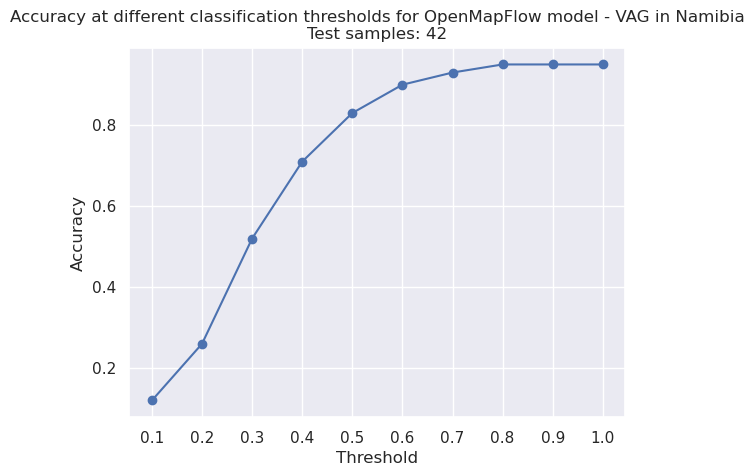

In [24]:
plt.plot(thresholds, accuracies_omf, marker='o')
plt.xticks(thresholds)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title(f'Accuracy at different classification thresholds for OpenMapFlow model - {region_of_interest}\nTest samples: {omf_test_samples}')
plt.show()

## Compare random forest and OpenMapFlow model for different regions of interest

In [25]:
def compare_accuracies(region_of_interest, directory):
    
    ### actual labels
    
    # load actual labels
    file = 'actual_labels.csv'
    path = os.path.join(directory, file)
    actual_labels = pd.read_csv(path)
    
    # prepare coordinates
    actual_labels['lon'] = actual_labels.apply(lambda x: eval(x['.geo'])['coordinates'][0], axis=1)
    actual_labels['lat'] = actual_labels.apply(lambda x: eval(x['.geo'])['coordinates'][1], axis=1)
    actual_labels = actual_labels.drop('.geo', axis=1)    
    
    
    
    ### random forest class probabilities
    
    # load random forest predictions
    file = 'random_forest_class_probabilities.csv'
    path = os.path.join(directory, file)
    random_forest_class_probabilities = pd.read_csv(path)
    
    # prepare predictions
    random_forest_class_probabilities['system:index'] = random_forest_class_probabilities['system:index'].apply(lambda x: x.split('_')[0])
    random_forest_class_probabilities = random_forest_class_probabilities[['system:index', 'classification']]
    random_forest_class_probabilities = pd.merge(actual_labels, random_forest_class_probabilities, how='inner', on='system:index')
    random_forest_class_probabilities = random_forest_class_probabilities.drop(['system:index', 'lon', 'lat'], axis=1)
    random_forest_class_probabilities = random_forest_class_probabilities.rename(columns={'classification': 'crop_probability'})
    
    # calculate accuracies at different thresholds
    thresholds = np.arange(0.1,1.1,0.1)
    actual_test_labels = list(random_forest_class_probabilities['crop'])
    accuracies_rf = []
    for threshold in thresholds:
        predictions = [1 if i >= threshold else 0 for i in list(random_forest_class_probabilities['crop_probability'])]
        accuracy = round(accuracy_score(actual_test_labels, predictions), 2)
        accuracies_rf.append(accuracy)
    
    
    
    ### OpenMapFlow predictions
    
    # load OpenMapFlow predictions
    openmapflow_predictions = pd.DataFrame()
    for threshold in thresholds:
        if threshold == 1.0:
            threshold = 1
        file = 'openmapflow_predictions_threshold_' + str(round(threshold, 2)).replace('.', '_') + '.csv'
        path = os.path.join(directory, file)
        openmapflow_predictions_temp = pd.read_csv(path)
        openmapflow_predictions_temp['threshold'] = threshold
        openmapflow_predictions = pd.concat([openmapflow_predictions, openmapflow_predictions_temp], ignore_index=True)
    
    # prepare coordinates
    openmapflow_predictions['lon'] = openmapflow_predictions.apply(lambda x: eval(x['.geo'].replace('false', '0'))['coordinates'][0], axis=1)
    openmapflow_predictions['lat'] = openmapflow_predictions.apply(lambda x: eval(x['.geo'].replace('false', '0'))['coordinates'][1], axis=1)
    openmapflow_predictions = openmapflow_predictions.drop(['system:index', 'count', '.geo'], axis=1)
    
    # transform to GeoDataFrame
    openmapflow_predictions = gpd.GeoDataFrame(openmapflow_predictions, geometry=gpd.points_from_xy(openmapflow_predictions.lon, openmapflow_predictions.lat))
    actual_labels = gpd.GeoDataFrame(actual_labels, geometry=gpd.points_from_xy(actual_labels.lon, actual_labels.lat))
    
    # join with sampled train and test points
    openmapflow_predictions = gpd.sjoin_nearest(openmapflow_predictions, actual_labels, how='inner')
    
    # calculate accuracy at different thresholds
    accuracies_omf = []
    for threshold in thresholds:
        true = list(openmapflow_predictions[openmapflow_predictions['threshold'] == threshold]['crop'])
        pred = list(openmapflow_predictions[openmapflow_predictions['threshold'] == threshold]['prediction'])
        accuracy = round(accuracy_score(true, pred), 2)
        accuracies_omf.append(accuracy)
    
    # plot accuracies for random forest and OpenMapFlow model
    rf_test_samples = random_forest_class_probabilities.shape[0]
    omf_test_samples = int(openmapflow_predictions.shape[0] / len(thresholds))
    plt.plot(thresholds, accuracies_rf, marker='o', label=f'Random forest (test samples: {rf_test_samples})')
    plt.plot(thresholds, accuracies_omf, marker='x', label=f'OpenMapFlow model (test samples: {omf_test_samples})')
    plt.xticks(thresholds)
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy at different classification thresholds - {region_of_interest}')
    plt.legend()
    plt.show()

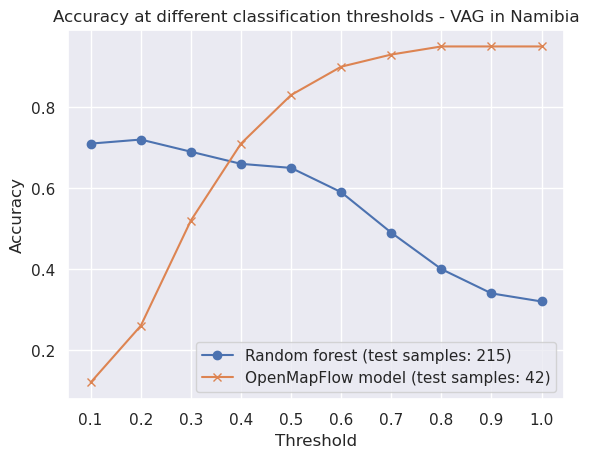

CPU times: user 1.12 s, sys: 103 ms, total: 1.22 s
Wall time: 1.05 s


In [26]:
%%time
compare_accuracies('VAG in Namibia', '../processed_data/classification_threshold_evaluation/NAM')

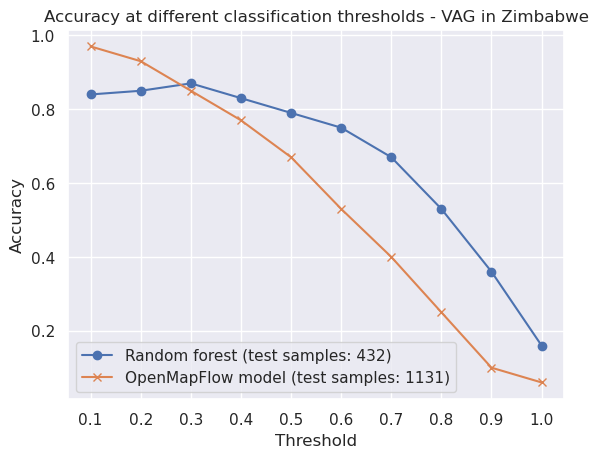

CPU times: user 2.29 s, sys: 192 ms, total: 2.48 s
Wall time: 2.25 s


In [27]:
%%time
compare_accuracies('VAG in Zimbabwe', '../processed_data/classification_threshold_evaluation/ZIM')